In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### 1. Dataset
Load the prostate dataset. 

In [242]:
train_frame = pd.read_csv('./data/prostate_train.csv')
test_frame = pd.read_csv('./data/prostate_test.csv')

We will use the target $y=$lpsa throughout this exercise, and all other features as predictors $X$, so split the train and test sets by $X,y$.

In [243]:
Xtrain = train_frame.drop('lpsa', axis=1)
ytrain = train_frame['lpsa'].copy()
Xtest = test_frame.drop('lpsa', axis=1)
ytest = test_frame['lpsa'].copy()

### 2. Ridge Regression
Perform Ridge regression with target lpsa and all other features as predictors. Do so for different regularization parameters $\lambda$.
Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.238, Fig. 6.4.

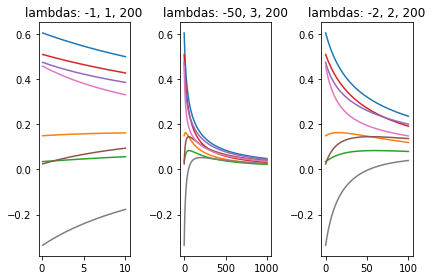

In [244]:
from sklearn.linear_model import Ridge  
    
# This is an example of possible values for the lambda that you can consider.
lambdas = [np.logspace(-1, 1, 200),
            np.logspace(-1, 3, 200),
            np.logspace(-1, 2, 200)]
lambda_labels = ["lambdas: -1, 1, 200", "lambdas: -1, 3, 200", "lambdas: -1, 2, 200"]
def graph(lambdas):
            for l in lambdas:
                ridge = Ridge(alpha=l, fit_intercept=False)
                ridge.fit(Xtrain, ytrain)
                coefs.append(ridge.coef_)

fig, axs = plt.subplots(1,3)
for i in range(3):
    coefs = []
    graph(lambdas[i])
    axs[i].plot(lambdas[i], coefs)
    axs[i].set_title(f"{lambda_labels[i]}")

fig.tight_layout()
plt.show()

### 3. Cross Validation & Ridge
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ for the ridge regression model.

In [245]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score as cvs

# K-fold cross validation
kf = KFold(n_splits = 10)
ridge = Ridge(alpha=1)
ridge.fit(Xtrain, ytrain)
scores_train = cvs(ridge, Xtrain, ytrain, cv=kf, n_jobs=-1)
scores_test = cvs(ridge, Xtest, ytest, cv=kf, n_jobs=-1)
print(ridge.coef_)
print(scores_train)
print(np.mean(scores_train))
print(scores_test)
print(np.mean(scores_test)) # -0.6516392629457897

[ 0.65403029  0.30533086 -0.02195116  0.07941491  0.43089049 -0.21907192
  0.01088324  0.10616645]
[-1.27445955e-01 -1.09978052e-01 -1.94520448e+00 -1.90110417e+01
 -3.33274083e+01 -1.05572344e+02 -5.26934966e-01  9.34640581e-02
  5.56247282e-01  5.66930778e-01]
-15.940371493677569
[ 0.96582613  0.08566869  0.25743074 -0.54099494  0.17755024 -1.61104649
  0.59010176 -1.64765749  0.54249855  0.62960077]
-0.05510220240554851


Report train and test error measured in MSE for this $\lambda$.

### 4. Lasso Regression
Perform Lasso regression with target lpsa and all other features as predictors. Do so for different parameters $\lambda$.

Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.242, Fig. 6.6.

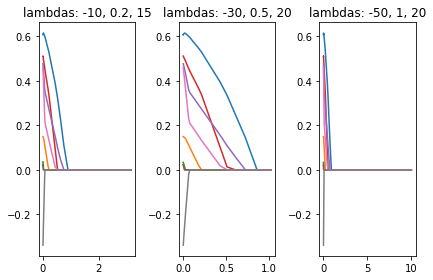

In [246]:
from sklearn.linear_model import Lasso  
    
# This is an example of possible values for the lambda that you can consider.
lambdas = [np.logspace(-15, 0.5, 200), # I don't know how to find lambdas that give nice looking graphs...
            np.logspace(-15, 0.01, 200),
            np.logspace(-15, 1, 200)]
lambda_labels = ["lambdas: -15, 0.5, 200", "lambdas: -15, 0.01, 200", "lambdas: -15, 1, 200"]

def graph(lambdas):
            for l in lambdas:
                ridge = Lasso(alpha=l, fit_intercept=False)
                ridge.fit(Xtrain, ytrain)
                coefs.append(ridge.coef_)

fig, axs = plt.subplots(1,3)
for i in range(3):
    coefs = []
    graph(lambdas[i])
    axs[i].plot(lambdas[i], coefs)
    axs[i].set_title(f"{lambda_labels[i]}")

fig.tight_layout()
plt.show()

## 5. Cross Validation & Lasso
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ in the Lasso.
		Report train and test error measured in MSE for this $\lambda$. 

In [247]:
kf = KFold(n_splits = 10)
lasso = Lasso()
lasso.fit(Xtrain, ytrain)
scores_train = cvs(lasso, Xtrain, ytrain, cv=kf, n_jobs=-1)
scores_test = cvs(lasso, Xtest, ytest, cv=kf, n_jobs=-1)
print(lasso.coef_)
print(scores_train)
print(np.mean(scores_train))
print(scores_test)
print(np.mean(scores_test))

[0. 0. 0. 0. 0. 0. 0. 0.]
[-1.52277598e+00 -6.37610841e-01 -7.26522137e+00 -9.45034810e+00
 -3.76589734e-02 -3.31891211e+01 -1.42816551e+01 -1.55119808e-01
 -1.22333304e+00 -3.02102964e-02]
-6.779305465492792
[-0.00995492 -0.75939607 -0.12880435 -5.29032473  0.01168275 -6.6089785
 -0.54800478 -0.60570702 -0.1283322   0.0862591 ]
-1.398156072270996


How many and which features are used?
		Compare this to the coefficients determined for ridge regression in part 3 of this exercise.

## 6. 

Compare the performance, in terms of MSE, of the best models in parts 3. and 5. Which model would you choose and why? What alternative model could have been used?

### Confession:

I feel as though I'm falling further and further behind in this course. I understand the intuition behind most of the concepts in lecture, and for the most part I can brute-force my way through the theoretical questions on the assignments. But when it comes to the programming exercises, there's such a gap between what we've gone over together, and what is being asked in the questions. Assignment 1 and 2 I got most of the programming part correct, but it's just a sea of package documentation, and I'm often not sure what the questions are asking for me to do. It's such a step up from the way we've worked through the concepts, it feels like there's not scaffolding or support to get me from A to B. I would hate to drop the course now, after putting in so much work, but I barely feel like I understand what's happening in these assignments.